<a href="https://colab.research.google.com/github/LuisAntonCosta/Modelo-de-previsao-de-drogas/blob/main/C%C3%B3pia_de_Pr%C3%A1tica_Classifica%C3%A7ao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula de Machine Learning: Classificação para Prever o Tipo de Droga

Neste notebook, vamos abordar como realizar uma **classificação** utilizando a biblioteca scikit-learn. O objetivo da classificação é prever uma categoria (neste caso, o tipo de droga) com base em variáveis explicativas.

## Índice
1. [Entendimento do Problema](#entendimento-do-problema)
2. [Importação das Bibliotecas Necessárias](#importação-das-bibliotecas-necessárias)
3. [Carregamento e Exploração dos Dados](#carregamento-e-exploração-dos-dados)
4. [Pré-processamento dos Dados](#pré-processamento-dos-dados)
5. [Divisão dos Dados em Treino e Teste](#divisão-dos-dados-em-treino-e-teste)
6. [Treinamento do Modelo de Classificação](#treinamento-do-modelo-de-classificação)
7. [Avaliação do Modelo](#avaliação-do-modelo)
8. [Conclusão](#conclusão)

## Entendimento do Problema

Neste problema, queremos prever a categoria da droga recomendada (X ou Y) com base em outras variáveis fornecidas no dataset. Cada amostra contém informações sobre um paciente, e a variável alvo será a recomendação da droga.

---

## Importação das Bibliotecas Necessárias

Primeiro, você precisa importar as bibliotecas essenciais, incluindo as bibliotecas de manipulação de dados e de machine learning.


In [ ]:
# Dica: Aqui, importe as bibliotecas necessárias para análise de dados e machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn para o modelo de classificação e divisão dos dados
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregamento e Exploração dos Dados

Aqui você vai carregar o arquivo CSV com seus dados e fazer uma exploração inicial para entender como ele está estruturado. Isso inclui verificar o cabeçalho, tipos de dados e estatísticas descritivas.

---
Dica: Use o `pandas` para carregar o arquivo CSV.


In [ ]:
# Dica: Carregue seu arquivo CSV e faça a leitura inicial
df = pd.read_csv("/content/drive/MyDrive/oficina de dados/data/drug200.csv")

# Visualize as primeiras linhas do DataFrame para entender sua estrutura
df.head()



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Dicas de Exploração
1. Verifique os tipos de dados das colunas usando `df.info()`.
2. Use `df.describe()` para ver as estatísticas descritivas das colunas numéricas.
3. Verifique se há variáveis categóricas que precisarão ser codificadas (transformadas em numéricas).
4. Use um gráfico de barras ou countplot para ver a distribuição das classes.

---

## Pré-processamento dos Dados

Aqui você vai preparar os dados para o modelo de classificação. Dependendo do tipo de dados que você tem, pode ser necessário realizar as seguintes etapas:

- **Tratar valores ausentes**: Verifique se há valores faltantes e decida como lidar com eles (remoção ou imputação).
- **Codificação de variáveis categóricas**: Se houver variáveis categóricas, como o tipo de droga ou outra informação qualitativa, você precisará transformar essas variáveis em números.
- **Normalização/Padronização**: Embora árvores de decisão não exijam que as variáveis estejam na mesma escala, outros modelos como SVM podem se beneficiar de dados normalizados.

---
Dica: Verifique se há dados faltantes com `df.isnull().sum()` e, se necessário, trate-os antes de seguir para a modelagem.


In [ ]:
# Dica: Verifique se há dados ausentes
df.isnull().sum()

# Dica: Para variáveis categóricas, use pd.get_dummies() se necessário

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Drug'] = le.fit_transform(df['Drug'])


In [ ]:
df['BP'].unique()

df['BP'] = df['BP'].replace({'HIGH':2, 'NORMAL':1, 'LOW':0})

<ipython-input-45-fc660c3444cf>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP'] = df['BP'].replace({'HIGH':2, 'NORMAL':1, 'LOW':0})


In [ ]:
df['Cholesterol'].unique()
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH':2, 'NORMAL':1})

<ipython-input-46-6bf4c7d241e3>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cholesterol'] = df['Cholesterol'].replace({'HIGH':2, 'NORMAL':1})


In [ ]:
df['Sex'].unique()
df['Sex'] = df['Sex'].replace({'M':1,'F':0})

<ipython-input-47-f8c810fe56c4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'M':1,'F':0})


## Divisão dos Dados em Treino e Teste

Depois de preparar os dados, você deve dividi-los em conjuntos de treino e teste. O conjunto de treino será usado para ajustar o modelo e o conjunto de teste será usado para avaliar seu desempenho.

---
Dica: Use a função `train_test_split` para dividir os dados. Recomenda-se usar 80% dos dados para treino e 20% para teste.


In [ ]:
# Dica: Divida o dataset em variáveis independentes (X) e dependente (y)
# Exemplo: X = df.drop('target_column', axis=1)
#          y = df['target_column']

X = df.drop('Drug', axis=1)
y = df['Drug']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Tamanho do conjunto de treino: {X_train.shape[0]} amostras')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]} amostras')


Tamanho do conjunto de treino: 160 amostras
Tamanho do conjunto de teste: 40 amostras


## Treinamento do Modelo de Classificação

Agora que os dados estão divididos, é hora de treinar um modelo de classificação. Neste exemplo, será utilizada a **árvore de decisão** como modelo inicial. Este modelo pode usar o índice de Gini ou a entropia como critério para determinar a impureza dos nós.

---
Dica: Utilize o `DecisionTreeClassifier()` do scikit-learn para ajustar o modelo nos dados de treino.


In [ ]:
# Dica: Instancie o modelo de árvore de decisão com o critério Gini
clf = DecisionTreeClassifier(criterion='gini',random_state = 42)

# Treine o modelo
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Avaliação do Modelo

Após o treinamento, você deve avaliar o desempenho do modelo utilizando o conjunto de teste. As principais métricas de avaliação incluem:

- **Acurácia**: Proporção de previsões corretas.
- **Matriz de confusão**: Mostra a contagem de previsões verdadeiras e falsas para cada classe.
- **Relatório de classificação**: Inclui métricas como precisão, recall e F1-score para cada classe.

---
Dica: Utilize `accuracy_score`, `confusion_matrix` e `classification_report` para avaliar o modelo.


Acurácia: 1.0
Matriz de confusão:
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]


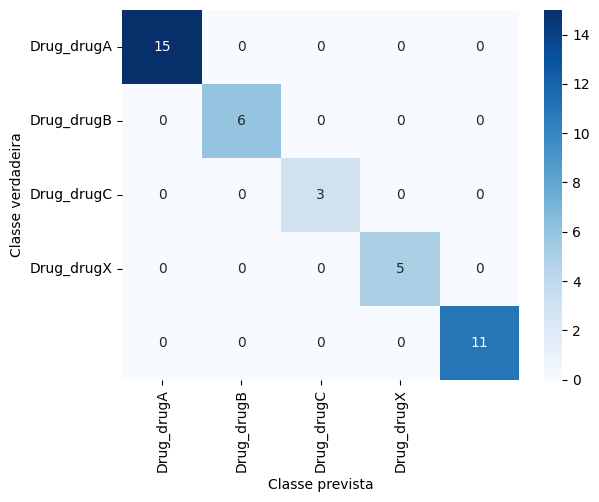

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
# Dica: Faça as previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Cálculo da acurácia
accuracy = accuracy_score(y_test,y_pred)
print(f'Acurácia: {accuracy}')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusão:')
print(conf_matrix)

class_names = ['Drug_drugA', 'Drug_drugB', 'Drug_drugC', 'Drug_drugX']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names) #matriz detalhada
plt.xlabel('Classe prevista')
plt.ylabel('Classe verdadeira')
plt.show()


# Relatório de classificação
print('Relatório de Classificação:\n', classification_report(y_test, y_pred))


## Conclusão

Você acabou de passar por um processo completo de implementação de um modelo de classificação para prever o tipo de droga. Relembrando os passos:

1. Exploramos e entendemos o conjunto de dados.
2. Realizamos o pré-processamento, incluindo o tratamento de valores ausentes e codificação de variáveis categóricas.
3. Dividimos os dados em conjuntos de treino e teste.
4. Treinamos o modelo de árvore de decisão e avaliamos seu desempenho.

### Próximos Passos:
- Testar outros algoritmos de classificação como **Random Forest**, **SVM**, ou **Logistic Regression**.
- Tentar otimizar a árvore de decisão utilizando técnicas de **poda** para evitar overfitting.
- Realizar **validação cruzada** para uma avaliação mais robusta do desempenho do modelo.
